https://www.datacamp.com/tutorial/principal-component-analysis-in-python

https://www.geeksforgeeks.org/ml-t-distributed-stochastic-neighbor-embedding-t-sne-algorithm/

## PCA

In [1]:
import pandas as pd
import numpy as np


In [58]:
np.random.seed(42)
data = np.random.uniform(-2, 2, size=(100, 10)).round(4)
df = pd.DataFrame(data, columns=[f'Column_{i+1}' for i in range(10)])
print(df)

    Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0    -0.5018    1.8029    0.9280    0.3946   -1.3759   -1.3760   -1.7677   
1    -1.9177    1.8796    1.3298   -1.1506   -1.2727   -1.2664   -0.7830   
2     0.4474   -1.4420   -0.8314   -0.5346   -0.1757    1.1407   -1.2013   
3     0.4302   -1.3179   -1.7398    1.7955    1.8625    1.2336   -0.7815   
4    -1.5118   -0.0193   -1.8624    1.6373   -0.9649    0.6501   -0.7532   
..       ...       ...       ...       ...       ...       ...       ...   
95    0.4021    0.6601   -1.2985    1.6576   -0.3249   -0.4674    0.0757   
96   -1.6688    0.4126   -1.0186   -0.4428   -0.8452   -0.5773    0.8762   
97    0.6547    1.7473    0.9303   -1.1402   -1.8753   -0.9509    0.3803   
98   -0.6630    1.0836   -1.5736   -1.6994    0.9128   -0.0180    0.7536   
99    1.1977    0.7788   -0.9114    0.3609   -0.5561   -1.6337    1.6693   

    Column_8  Column_9  Column_10  
0     1.4647    0.4045     0.8323  
1     0.0990   

In [59]:
df.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
0,-0.5018,1.8029,0.9280,0.3946,-1.3759,-1.3760,-1.7677,1.4647,0.4045,0.8323
1,-1.9177,1.8796,1.3298,-1.1506,-1.2727,-1.2664,-0.7830,0.0990,-0.2722,-0.8351
2,0.4474,-1.4420,-0.8314,-0.5346,-0.1757,1.1407,-1.2013,0.0569,0.3697,-1.8142
3,0.4302,-1.3179,-1.7398,1.7955,1.8625,1.2336,-0.7815,-1.6093,0.7369,-0.2394
4,-1.5118,-0.0193,-1.8624,1.6373,-0.9649,0.6501,-0.7532,0.0803,0.1868,-1.2606


In [60]:
df.tail()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
95,0.4021,0.6601,-1.2985,1.6576,-0.3249,-0.4674,0.0757,-1.8121,-1.3349,0.9521
96,-1.6688,0.4126,-1.0186,-0.4428,-0.8452,-0.5773,0.8762,-0.8115,0.2656,-0.0958
97,0.6547,1.7473,0.9303,-1.1402,-1.8753,-0.9509,0.3803,-1.7943,-0.0145,0.3874
98,-0.6630,1.0836,-1.5736,-1.6994,0.9128,-0.0180,0.7536,-0.2607,-1.0144,1.2764
99,1.1977,0.7788,-0.9114,0.3609,-0.5561,-1.6337,1.6693,-1.4527,1.8009,-0.2160


In [61]:
df.describe()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.166785,0.237954,-0.190883,0.043719,-0.197307,0.102819,-0.117686,0.032795,0.022003,-0.156345
std,1.202139,1.167934,1.163540,1.049714,1.191328,1.184174,1.146287,1.140767,1.239684,1.158302
min,-1.951400,-1.981500,-1.977900,-1.941800,-1.938200,-1.963200,-1.954600,-1.956600,-1.979800,-1.836500
25%,-1.388275,-0.817275,-1.288925,-0.666550,-1.283525,-0.920825,-0.948025,-0.895975,-1.090000,-1.268350
50%,-0.170450,0.418650,-0.174400,0.053800,-0.319600,-0.005950,-0.260600,0.089650,0.047450,-0.151100
75%,0.835100,1.208325,0.614550,0.967325,0.832725,1.218825,0.866975,1.015675,1.060300,0.905400
max,1.962000,1.998900,1.986500,1.850600,1.942600,1.971900,1.944000,1.987500,1.949100,1.947500


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Column_1   100 non-null    float64
 1   Column_2   100 non-null    float64
 2   Column_3   100 non-null    float64
 3   Column_4   100 non-null    float64
 4   Column_5   100 non-null    float64
 5   Column_6   100 non-null    float64
 6   Column_7   100 non-null    float64
 7   Column_8   100 non-null    float64
 8   Column_9   100 non-null    float64
 9   Column_10  100 non-null    float64
dtypes: float64(10)
memory usage: 7.9 KB


In [63]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df) # normalizing the features

In [64]:
x.shape

(100, 10)

check whether the normalized data has a mean of zero and a standard deviation of one.

In [65]:
np.mean(x),np.std(x)

(-2.6645352591003756e-17, 0.9999999999999999)

convert the normalized features into a tabular format with the help of DataFrame

In [66]:
cols = ['column'+str(i) for i in range(x.shape[1])]

In [67]:
df = pd.DataFrame(x,columns=cols)

In [68]:
df.head()

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9
0,-0.280086,1.346677,0.966464,0.335947,-0.994294,-1.255111,-1.446694,1.261537,0.310098,0.857829
1,-1.463837,1.412679,1.313529,-1.143489,-0.907232,-1.162090,-0.583332,0.058328,-0.238516,-0.588943
2,0.513484,-1.445644,-0.553263,-0.553706,0.018228,0.880876,-0.950087,0.021237,0.281885,-1.438491
3,0.499104,-1.338853,-1.337917,1.677225,1.737711,0.959722,-0.582017,-1.446718,0.579582,-0.072065
4,-1.124488,-0.221374,-1.443816,1.525758,-0.647563,0.464491,-0.557204,0.041853,0.133604,-0.958142


In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(x)

In [70]:
pca_df = pd.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2','principal component 3'])

In [71]:
pca_df.head(15)

,principal component 1,principal component 2,principal component 3
0,-2.438039,1.280699,0.806998
1,-1.946623,1.736777,-0.027825
2,1.072358,-0.275121,-0.109961
3,2.071992,-2.538869,1.307988
4,0.506622,-0.649368,0.606219
5,0.220506,-0.342004,2.958884
6,-1.225994,0.988200,0.154781
7,3.178768,-1.354821,0.182590
8,-0.150696,0.464236,-2.029289
9,0.473386,1.069010,1.373263


explained_variance_ratio provides you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [72]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15709089 0.13574776 0.12237176]


From the above output, you can observe that the principal component 1 holds 15.7% of the information, principal component 2 holds 13.5% of the information while the principal component 3 holds only 12.2% of the information. Also, the other point to note is that while projecting ten-dimensional data to a two-dimensional data, and around 50% information was lost.

## t-SNE

In [74]:
from sklearn.manifold import TSNE

In [75]:
df = pd.read_csv('/content/mnist_train.csv')


In [76]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
l = df['label']
d = df.drop("label", axis = 1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47049 entries, 0 to 47048
Columns: 785 entries, label to 28x28
dtypes: float64(14), int64(771)
memory usage: 281.8 MB


In [79]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,47049.000000,47049.0,47049.0,47049.0,47049.0,47049.0,47049.0,47049.0,47049.0,47049.0,...,47048.000000,47048.000000,47048.000000,47048.000000,47048.000000,47048.000000,47048.0,47048.0,47048.0,47048.0
mean,4.453378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.199052,0.096200,0.055539,0.024592,0.019278,0.002551,0.0,0.0,0.0,0.0
std,2.892655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.001270,4.070459,3.188077,1.904820,1.895250,0.391410,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [80]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(47049, 784)


Reduce the 784 columns data to 2 dimensions and create a scatter plot to visualize the same

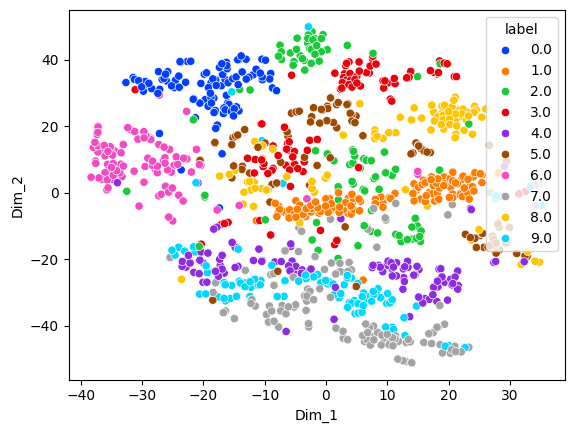

In [83]:
# Picking the top 1000 points as TSNE
data_1000 = standardized_data[0:1000, :]
labels_1000 = l[0:1000]

model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame to help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the result of tsne
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()